# Machine Learning in Python - Project 1

Due Friday, March 11th by 5 pm.

Gregoris Georgiou, Antonis Hadjiosif, Yasmin Hengster & Eshan Ratnaweera

## 0. Setup

**`office_csv`**

* `season` - Season number of the episode
* `episode` - Episode number within a season
* `episode_name` - Episode name
* `director` - Episode director(s), names are separated by `;`
* `writer` - Episode writer(s), names are separated by `;`
* `imdb_rating` - Episode rating on IMDB
* `total_votes` - Number of ratings for episode on IMDB
* `air_date` - Original air date of episode
* `n_lines` - Number of spoken lines in episode
* `n_directions` - Number of lines containing a stage direction
* `n_words` - Number of dialog words in episide
* `n_speak_char` - Number of different characters with spoken lines in episode
* `main_chars` - Main characters appearing in episode (main characters were determined to be characters appearing in more than 1/2 of the episodes)

In [1]:
#Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

#sklearn modules
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/mlp/projects/1')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 cold_opens.csv        project1_new.ipynb   README.md	     the_office.gsheet
'MLP Project 1.gdoc'   project1.zip	    the_office.csv


In [3]:
#Load data
d = pd.read_csv("the_office.csv")
openings = pd.read_csv("cold_opens.csv")
d['cold_opens'] = openings['cold_opens']
d.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars,cold_opens
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,0.0
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...,0.0
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,0.0
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,0.0
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...,0.0


##Pre-processing

In [4]:
# ER & YH

# Check to see if there are any duplicates, where episodes appear more than once
display(d.duplicated().sum())

# Check to see missing values
display(np.sum(pd.isnull(d)))

#no duplicates and missing values

0

season          0
episode         0
episode_name    0
director        0
writer          0
imdb_rating     0
total_votes     0
air_date        0
n_lines         0
n_directions    0
n_words         0
n_speak_char    0
main_chars      0
cold_opens      0
dtype: int64

##Descriptive statistics and Train-set/test set

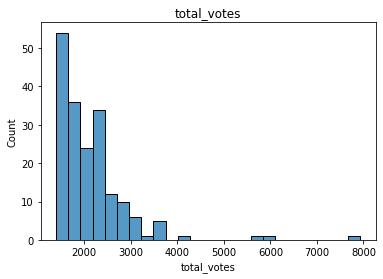

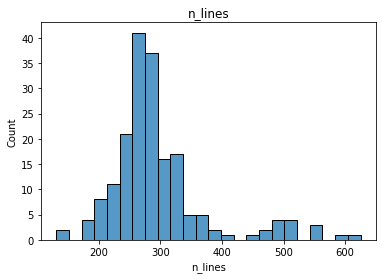

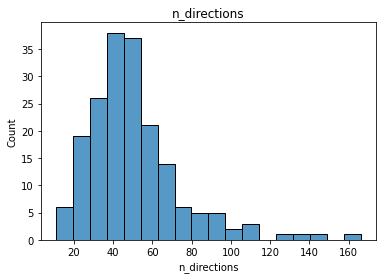

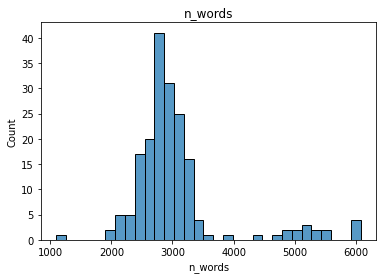

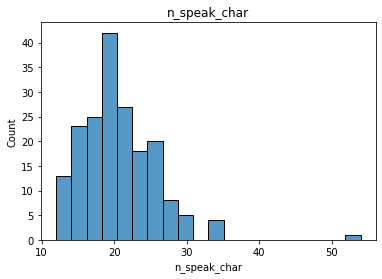

In [5]:
#Descriptive statistics & histograms
d.describe()
d.count()
num_data = ['total_votes','n_lines','n_directions','n_words','n_speak_char']
#dd = d.drop(['episode','episode_name','air_date','imdb_rating','season','director','writer','main_chars'],1)
#For the report only include 1 or change Layout
for i in num_data:
  sns.histplot(x = d[i])
  plt.title(i)
  plt.show()

In [6]:
#one-hot encoding

d_new = d.copy()

# one-hot for directors
directors = np.unique(';'.join(d['director']).split(';'))
directors = list(map(lambda orig_string: orig_string + '_d', directors))
for dir in directors:
    d_new[dir] = np.zeros(186)
    for i in range(186):
      if dir.replace("_d","") in d_new['director'][i]:
        d_new[dir][i] = 1

# one-hot for writers
writers = np.unique(';'.join(d['writer']).split(';'))
writers = list(map(lambda orig_string: orig_string + '_w', writers))
for w in writers:
    d_new[w] = np.zeros(186)
    for i in range(186):
      if w.replace("_w","") in d_new['writer'][i]:
        d_new[w][i] = 1

# one-hot for main characters
main_characters = np.unique(';'.join(d['main_chars']).split(';'))
for char in main_characters:
    d_new[char] = np.zeros(186)
    for i in range(186):
      if char in d_new['main_chars'][i]:
        d_new[char][i] = 1


#by inspection there is 2 different names for the same name for,correct_name(incorrect_name),
#Charles McDougall(Charles McDougal),Claire Scanlon(Claire Scanlong),Greg Daniels(Greg Daneils), Ken Whittingham(Ken Wittingham), Paul Lieberstein(Paul Lieerstein)

directors_corrected = directors.copy()
directors_corrected.remove('Charles McDougal_d')
directors_corrected.remove('Claire Scanlong_d')
directors_corrected.remove('Greg Daneils_d')
directors_corrected.remove( 'Ken Wittingham_d')
directors_corrected.remove('Paul Lieerstein_d')

correct = ['Charles McDougall_d','Claire Scanlon_d','Greg Daniels_d', 'Ken Whittingham_d', 'Paul Lieberstein_d']
wrong = ['Charles McDougal_d','Claire Scanlong_d','Greg Daneils_d', 'Ken Wittingham_d', 'Paul Lieerstein_d']

#merge columns
for i in range(5):
  d_new[correct[i]] = d_new[correct[i]] + d_new[wrong[i]]
  for j in range(186):
    if d_new[correct[i]][j] == 2.0:
      d_new[correct[i]][j] = 1.0
  d_new = d_new.drop(wrong[i],axis = 1)

#By inspection main_chars and writers do not have duplicate names

d_new.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Average imdb rating of the whole series 8.250537634408607


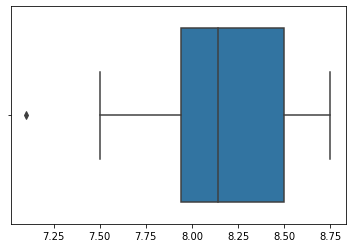

[1, 1, 1, 5, 4, 1, 1, 2, 7, 1, 2, 1, 1, 1, 9, 2, 2, 2, 1, 2, 15, 4, 1, 2, 11, 3, 1, 3, 1, 1, 2, 2, 1, 12, 9, 2, 1, 1, 8, 1, 1, 2, 14, 7, 3, 15, 1, 2, 1, 2, 1, 3, 3, 4, 2]
3.4363636363636365


In [7]:
print("Average imdb rating of the whole series", np.mean(d_new['imdb_rating']))

rats = []
average_of_directed_episodes = []
for char in directors_corrected:

  #print(" ")
  #print("Numbers of times", char, "directed the series = ",len(d_new.loc[d_new[char] == 1]))
  #print("Average imdb rating when ", char, " directed the episode = ",np.mean(d_new.loc[d_new[char] == 1]['imdb_rating']))
  rats.append(np.mean(d_new.loc[d_new[char] == 1]['imdb_rating']))
  average_of_directed_episodes.append(len(d_new.loc[d_new[char] == 1]))

sns.boxplot(x = rats)
plt.show()
print(average_of_directed_episodes)
print(np.mean(average_of_directed_episodes))
#what do we want to do with this information -> drop directors where average rating is smaller than overall average, 
#and only consider director when at least directed 3 or 4? episodes, average directing is 3.4

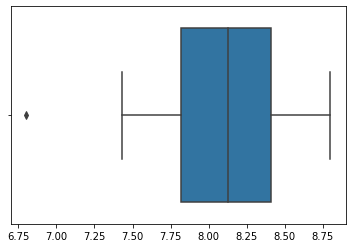

[6, 3, 2, 2, 15, 11, 1, 4, 8, 2, 2, 6, 2, 15, 2, 12, 7, 1, 11, 2, 2, 1, 11, 1, 15, 2, 10, 21, 2, 4, 16, 1, 2, 4, 2, 2, 2, 3, 1, 7]
5.575


In [8]:
#average number of episodes a writer contributed to
rats = []
average_of_written_episodes = []
for char in writers:
  rats.append(np.mean(d_new.loc[d_new[char] == 1]['imdb_rating']))
  average_of_written_episodes.append(len(d_new.loc[d_new[char] == 1]))

sns.boxplot(x = rats)
plt.show()
print(average_of_written_episodes)
print(np.mean(average_of_written_episodes))

In [9]:
#Train test, test set
#In lots of real world ML applications you train on historical data, and make predictions on future unseen data. 
#If this was the case we may want our data sorted by timestamp before creating the splits, since it matches the way you'll apply the model in the real world.
#Thus won't shuffle?
#drop columns we decided not to use: season, episode, episode_name, total_votes, we can also drop director, writer, main_char as they're converted into numerical data now

d_final = d_new.drop(['season','episode','air_date','director', 'writer','episode_name','total_votes','director','writer','main_chars'],axis=1)

#create principal component to be able to use it for the test_data as well
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = ['n_lines','n_directions','n_speak_char']
scaled = d_final.loc[:, features].values
scaled = StandardScaler().fit_transform(scaled)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf #principal component summarises n_lines, n_directions, n_speak_char


d_final = pd.concat([principalDf, d_final], axis = 1)

train_set, test_set = train_test_split(d_final, random_state=42, train_size=0.70, shuffle=True)
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)
display(train_set.head())
display(test_set.head())

,principal component 1,imdb_rating,n_lines,n_directions,n_words,n_speak_char,cold_opens,Alex Hardcastle_d,Amy Heckerling_d,Asaad Kelada_d,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,-0.562495,8.8,290,32,2911,20,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2.909010,8.8,507,91,5280,24,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.377775,8.1,220,61,2680,20,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,0.395044,8.0,273,59,2965,24,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,2.481198,8.2,501,62,5240,27,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


,principal component 1,imdb_rating,n_lines,n_directions,n_words,n_speak_char,cold_opens,Alex Hardcastle_d,Amy Heckerling_d,Asaad Kelada_d,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,0.151709,7.9,326,46,3304,21,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.012035,7.2,296,95,2908,20,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,0.478056,7.7,294,56,3042,24,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,-0.572763,8.3,265,26,3038,23,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.355802,8.2,267,46,3064,27,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


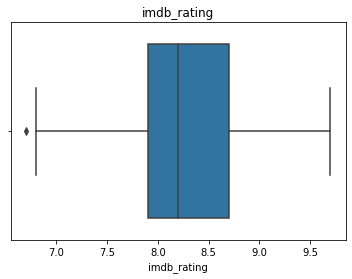

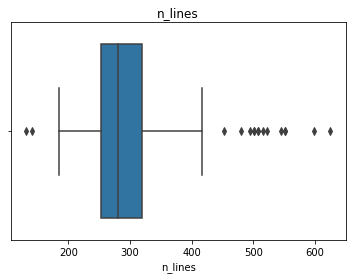

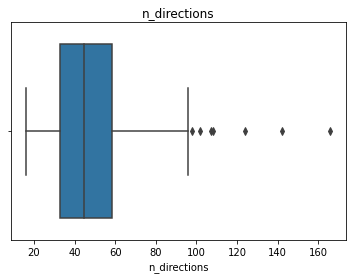

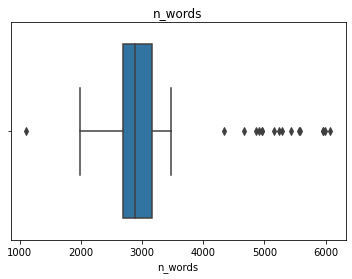

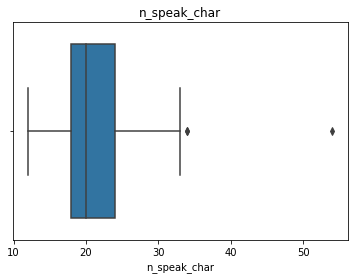

imdb_rating  has  1  outliers
n_lines  has  16  outliers
n_directions  has  7  outliers
n_words  has  17  outliers
n_speak_char  has  3  outliers


,principal component 1,imdb_rating,n_lines,n_directions,n_words,n_speak_char,cold_opens,Alex Hardcastle_d,Amy Heckerling_d,Asaad Kelada_d,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,-0.562495,8.8,290.0,32.0,2911.0,20.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.377775,8.1,220.0,61.0,2680.0,20.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.395044,8.0,273.0,59.0,2965.0,24.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,-0.569867,8.7,257.0,55.0,2834.0,17.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.212219,7.1,292.0,37.0,3141.0,22.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
# Outliers check in numerical data

d_num = ['imdb_rating','n_lines',	'n_directions',	'n_words',	'n_speak_char']
for i in d_num:
  sns.boxplot(x = train_set[i])
  plt.title(i)
  plt.show()

def tukey_fences(df_tf, k):
  l_quantile, u_quantile = np.quantile(df_tf, q = [0.25, 0.75])
  IQR = u_quantile - l_quantile
  u_boundary = u_quantile + (IQR * k)
  l_boundary = l_quantile - (IQR * k)
  return l_boundary, u_boundary

# k = 1.5 (default value)
for i in d_num: 
  l_boundary, u_boundary = tukey_fences(train_set[i], 1.5)
  tf_1 = np.where(train_set[i] < l_boundary, 1, 0)
  tf_2 = np.where(train_set[i] > u_boundary, 1, 0)
  tf_sum = tf_1 + tf_2
  #print how much outliers we have
  print(i, ' has ',np.sum(tf_sum),' outliers')


from sklearn.preprocessing import FunctionTransformer
#function that set outliers to np.nan
def rm_outlier(X):
  X_train = np.transpose(np.empty(shape = np.shape(X)))
  for index,i in enumerate(X):
    low, up = tukey_fences(X[i], 1.5)
    mask1 = np.where(X[i] < low, np.nan, X[i])
    mask2 = np.where(X[i] > up, np.nan, 0)
    mask = mask1 + mask2
    X_train[index] = mask
  return X_train

transformer = FunctionTransformer(rm_outlier)
#apply outlier function to numerical columns (not to hot encoded ones)
X_outlier = transformer.transform(train_set[d_num])
train_set[d_num] = pd.DataFrame(np.transpose(X_outlier))
#drop rows with outliers
train_set = train_set.dropna()
train_set = train_set.reset_index(drop=True)
train_set.head()



##Exploratory Data Analysis

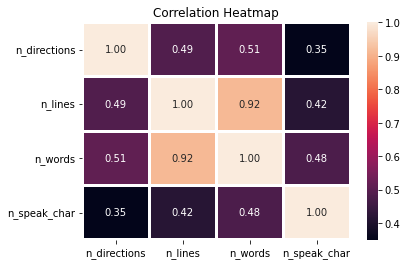

In [11]:
#Correlation 

sns.heatmap(d_final[['n_directions','n_lines','n_words','n_speak_char']].corr(), annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

#Very high correlation between n_words and n_lines ~ 0.92, can drop one of those
#Should season and episode be dropped?

#used d_final instead -> correlation is 0.92 again



In [12]:
#Are any of the features correlated with our output variable?

#only thing that might be correlated is total votes ~0.616, out of all of the featrues, n_speak_char seems to be the most important one

from scipy import stats
import numpy as np

for i, feature in enumerate(train_set[['n_directions','n_lines','n_words','n_speak_char']]):
    if not str(train_set[feature].dtypes) == "object":
        corr = pd.DataFrame(stats.pearsonr(train_set[feature], train_set['imdb_rating']), 
                            index = ["cor", "p-value"],
                            columns = [feature])
        if i ==0:
            all_corr = corr
        else:
            all_corr = pd.concat([all_corr, corr], axis = 1)
        
display(all_corr.round(3).sort_values(by="cor", axis=1))

,n_speak_char,n_words,n_directions,n_lines
cor,-0.285,-0.169,-0.060,0.024
p-value,0.003,0.080,0.538,0.807


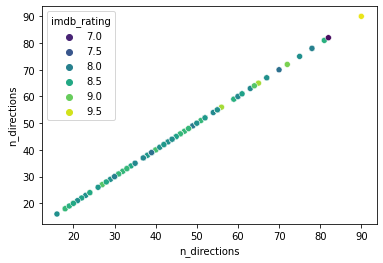

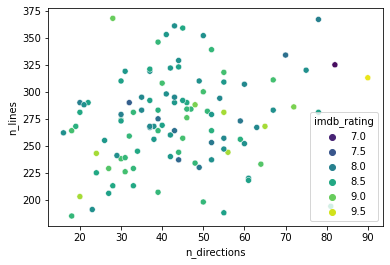

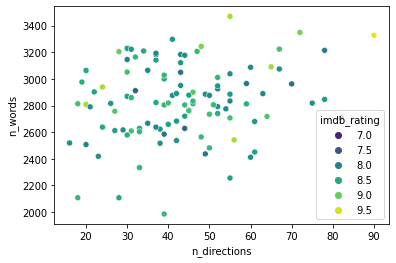

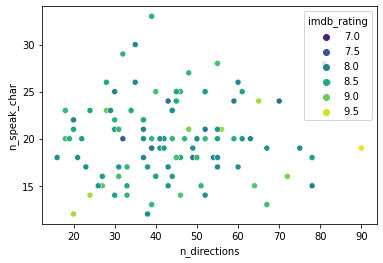

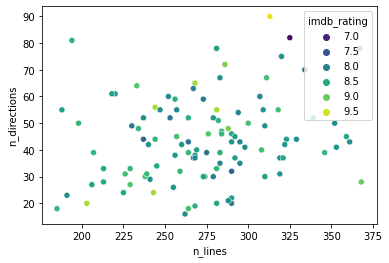

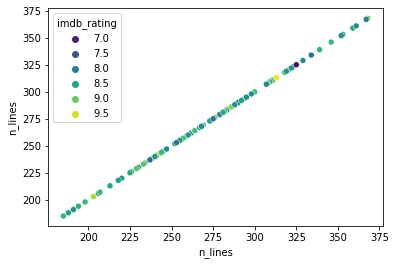

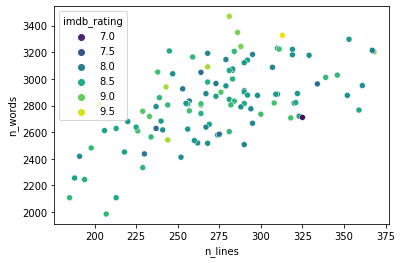

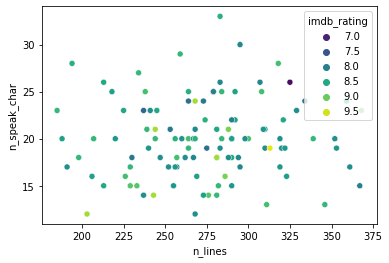

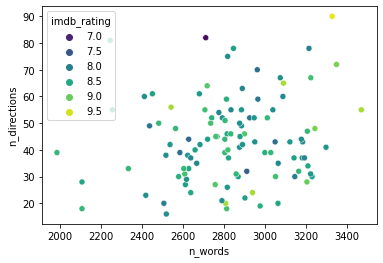

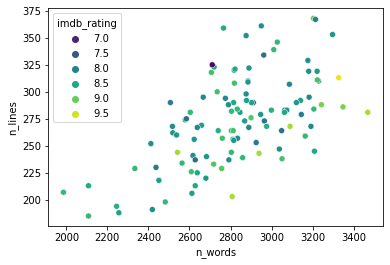

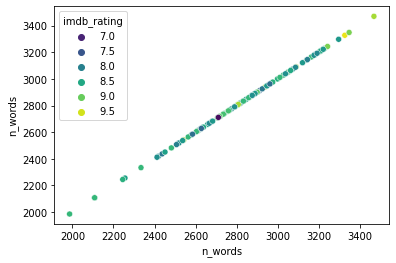

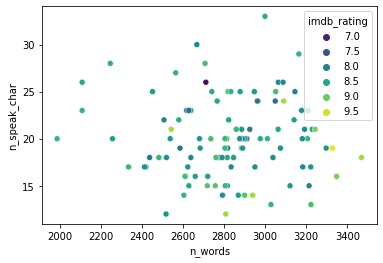

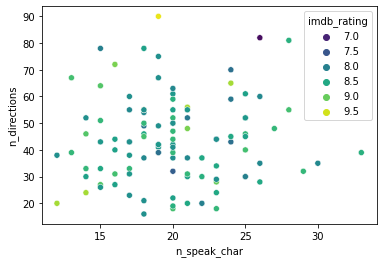

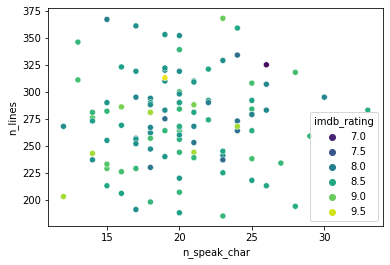

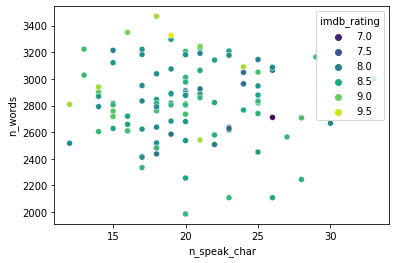

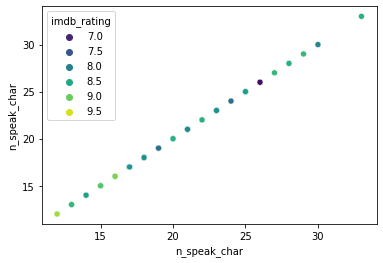

In [13]:
#just to visualise, can also use heatmaps instead


#ddd = d.drop(['episode','episode_name','air_date','imdb_rating','season','director','writer','main_chars'],1)

for i in train_set[['n_directions','n_lines','n_words','n_speak_char']]:
  for j in train_set[['n_directions','n_lines','n_words','n_speak_char']]:
    sns.scatterplot(x = train_set[i],y = train_set[j],hue=d['imdb_rating'],palette='viridis')
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()


#use plots for n lines and n words



In [14]:
#get rid of n_words and explain
train_set = train_set.drop('n_words',axis=1)
test_set = test_set.drop('n_words',axis=1)

#the final train and test data set are train_set and test_set, split into X data and output data (y)
output = 'imdb_rating'
y_train = train_set.loc[:,output]
X_train = train_set.drop(output, axis=1)
y_test = test_set.loc[:,output]
X_test = test_set.drop(output, axis=1)


In [15]:
X_train.head()

,principal component 1,n_lines,n_directions,n_speak_char,cold_opens,Alex Hardcastle_d,Amy Heckerling_d,Asaad Kelada_d,B.J. Novak_d,Brent Forrester_d,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,-0.562495,290.0,32.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.377775,220.0,61.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.395044,273.0,59.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,-0.569867,257.0,55.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.212219,292.0,37.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


##Linear Regression Model

In [16]:
#helper functions

def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    
    return rmse

In [17]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = X_train.copy()
X = X.drop(['principal component 1'], axis = 1)

lm = LinearRegression().fit(X, y_train)




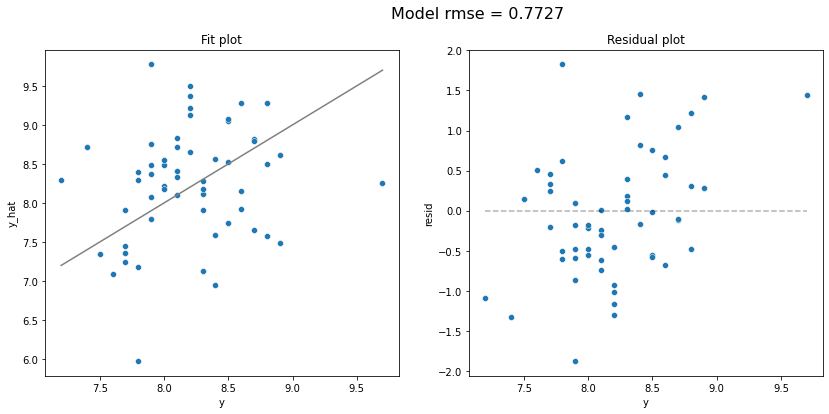

In [18]:
X_test_matrix = X_test.copy()
X_test_matrix = X_test_matrix.drop(['principal component 1'], axis = 1)

model_fit(lm, X_test_matrix, y_test, plot=True);

#ideally we want the points on the left plot on the grey line and the residual to be 0

In [19]:
model_fit(lm, X, y_train) 
#model performs better for training data, rmse_train < rmse_test

0.09840297332900436

In [20]:
from sklearn.preprocessing import StandardScaler
lm_scaled = make_pipeline(
    StandardScaler(),
    LinearRegression()
).fit(X, y_train)


#get_coefs(lm_scaled)

In [21]:
#model_fit(lm_scaled, X_test_matrix, y_test, plot=True); #have to scale X_test_matrix and y_test as well? rmse of order 10^13

#features = ['n_lines','n_directions','n_speak_char']
#X_test_scaled = X_test_matrix.values
#X_test_scaled = StandardScaler().fit_transform(X_test_matrix)
#y_test_scaled = StandardScaler().fit_transform(np.array(y_test).reshape(-1, 1))
#y_test_scaled = y_test_scaled.reshape(np.shape(y_test_scaled)[0])
#model_fit(lm_scaled, X_test_scaled, y_test_scaled, plot=True);
#rmse even higher order (O(10^14))

#remove scaling bit

##Ridge##

{'ridge__alpha': 151.75879396984922}


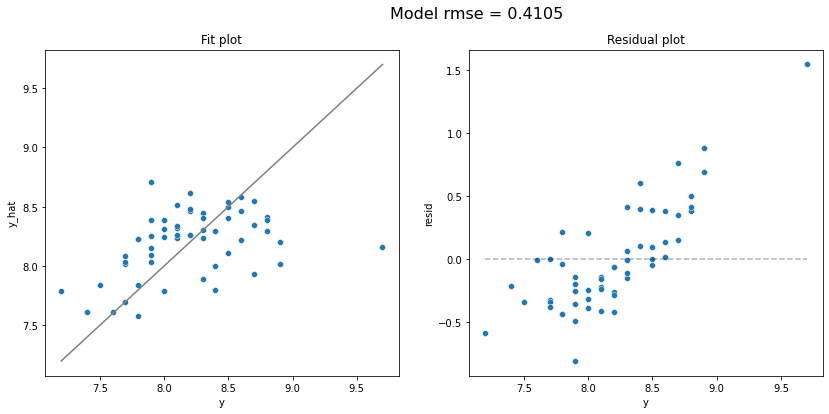

0.41050406588153937

In [22]:
from sklearn.linear_model import Ridge

#WITH STANDARD SCALER
alphas = np.linspace(0, 200, num=200)
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X, y_train)
print(gs.best_params_) 
model_fit(gs.best_estimator_, X_test_matrix, y_test, plot=True)


[ 8.19629630e+00  1.67894606e-02 -9.36097449e-04 -1.53108048e-02
  1.08471905e-02  0.00000000e+00 -2.28037606e-02  0.00000000e+00
 -6.88338080e-03 -9.07793875e-03  1.52133680e-05 -1.14281163e-03
  1.39489668e-02  6.38289335e-03  0.00000000e+00 -4.33685216e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.21337823e-02
  8.67028699e-04 -6.45063132e-03 -1.89937206e-02 -2.00917682e-02
  1.14932414e-02  3.70595918e-02  3.34513853e-02  3.16022467e-03
  1.19913935e-02 -1.94056847e-02  3.22364712e-03 -8.50434062e-04
 -2.73806651e-02 -1.41461939e-03  0.00000000e+00  1.97651843e-02
  1.37985524e-02  2.40915823e-03 -2.33046924e-02  1.63527547e-02
  1.14932414e-02  0.00000000e+00 -4.44141395e-03  3.87163940e-03
  0.00000000e+00 -1.37662965e-02  0.00000000e+00  9.17876028e-03
 -1.49153467e-02  0.00000000e+00  1.47182849e-03 -8.44408217e-04
 -6.52220113e-03  0.00000000e+00  0.00000000e+00  1.26907840e-03
  2.79533419e-02 -8.32142444e-03  2.34084514e-02 -1.38474637e-04
 -4.68046155e-04 -1.48912

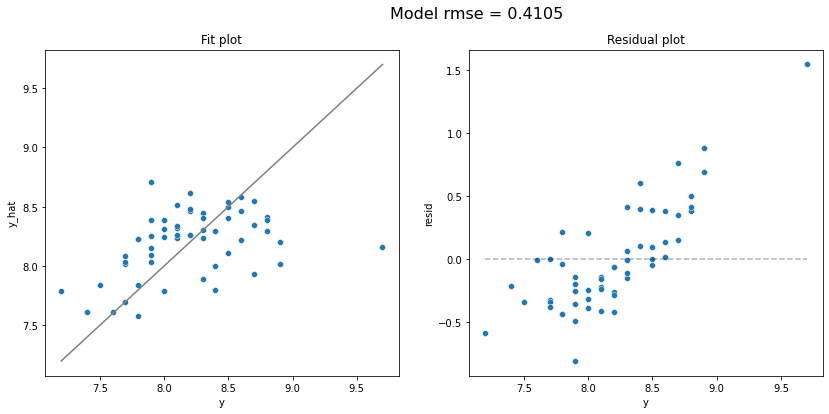

In [23]:
#Ridge
#Proof that with standard scaler best alpha is 151.758

from sklearn.linear_model import Ridge
r = make_pipeline(
    StandardScaler(),
    Ridge(alpha=151.758)
).fit(X, y_train)
print(get_coefs(r))

model_fit(r, X_test_matrix, y_test, plot=True);

{'ridge__alpha': 12.060301507537687}


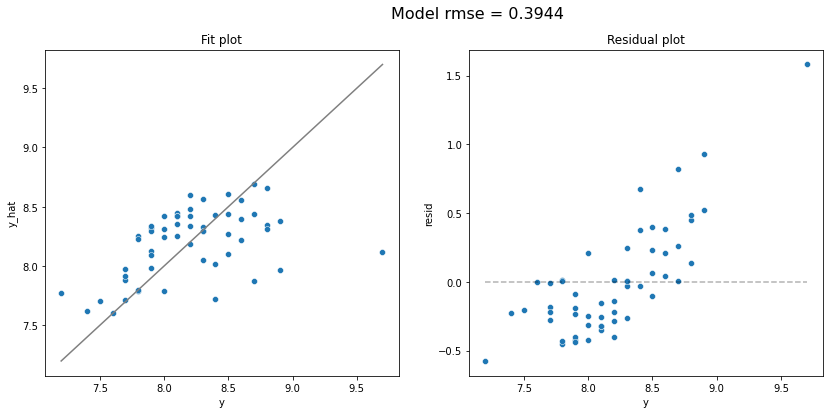

0.3943772215651426

In [24]:
from sklearn.linear_model import Ridge

#WITHOUT STANDARD SCALER
alphas = np.linspace(0, 200, num=200)
gs = GridSearchCV(
    make_pipeline(
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X, y_train)
print(gs.best_params_) 
model_fit(gs.best_estimator_, X_test_matrix, y_test, plot=True)


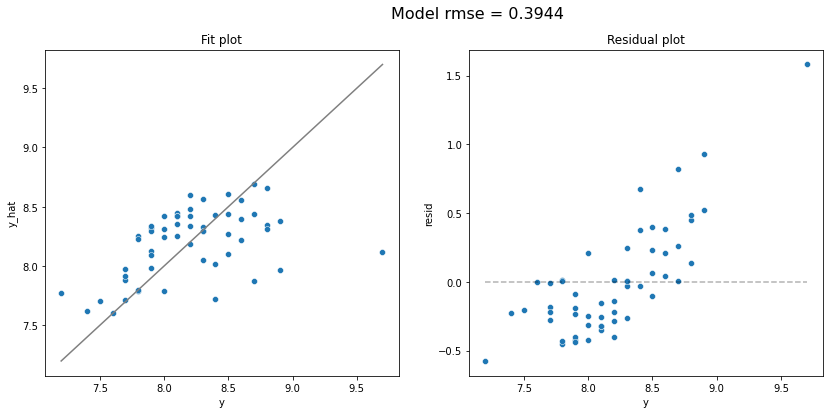

In [25]:
#WITHOUT STANDARD SCALER PROOF THAT ALPHA SHOULD BE 12.06

r_wo_scale = make_pipeline(
    Ridge(alpha=12.06) #how did you pick alpha?
).fit(X, y_train)

model_fit(r_wo_scale, X_test_matrix, y_test, plot=True);

#NOT A GOOD FIT
#RMSE decreases as expected

[1.00000000e-02 1.26485522e-02 1.59985872e-02 2.02358965e-02
 2.55954792e-02 3.23745754e-02 4.09491506e-02 5.17947468e-02
 6.55128557e-02 8.28642773e-02 1.04811313e-01 1.32571137e-01
 1.67683294e-01 2.12095089e-01 2.68269580e-01 3.39322177e-01
 4.29193426e-01 5.42867544e-01 6.86648845e-01 8.68511374e-01
 1.09854114e+00 1.38949549e+00 1.75751062e+00 2.22299648e+00
 2.81176870e+00 3.55648031e+00 4.49843267e+00 5.68986603e+00
 7.19685673e+00 9.10298178e+00 1.15139540e+01 1.45634848e+01
 1.84206997e+01 2.32995181e+01 2.94705170e+01 3.72759372e+01
 4.71486636e+01 5.96362332e+01 7.54312006e+01 9.54095476e+01
 1.20679264e+02 1.52641797e+02 1.93069773e+02 2.44205309e+02
 3.08884360e+02 3.90693994e+02 4.94171336e+02 6.25055193e+02
 7.90604321e+02 1.00000000e+03]
390.6939937054621


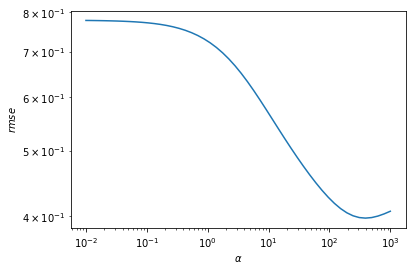

In [27]:
alpha = np.logspace(-2,3,50)
print(alpha)
rmse_ridge = np.zeros(len(alpha))
for index, i in enumerate(alpha):
  l = make_pipeline(
    StandardScaler(),
    Ridge(alpha=i)).fit(X, y_train)
  rmse_ridge[index] = model_fit(l, X_test_matrix, y_test)

plt.loglog(alpha,rmse_ridge)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$rmse$')

print(alpha[np.argmin(rmse_ridge)])

#THIS METHOD SHOWS A GOOD ALPHA WITG THW LOWEST RMSE BUT NOT GOOD FIT (WITH STANDARD SCALER)


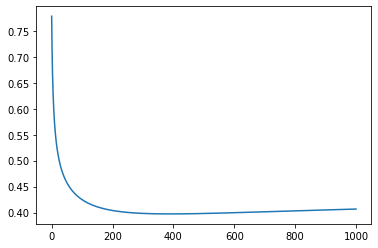

In [28]:
#WE WILL USE THE ONE WITH THE STANDARDSCALER SINCE IT IS BETTER ACCORDING TO WORKSHOP 5 TO STANDARDIZE DATA, AND THEY ARE VERY SIMILAR ANYWAYS


alphas = np.logspace(-2, 3, num=200) # from 10^-2 to 10^3

betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X, y_train)
    
    betas.append((get_coefs(m)[1:]))
    rmses.append(model_fit(m, X_test_matrix, y_test))

plt.plot(alphas,rmses)

In [29]:
res = pd.DataFrame(
    data = betas,
    columns = d_final[X.columns].columns, # Label columns w/ feature names
).assign(
    alpha = alphas,
    rmse = rmses
).melt(
    id_vars = ('alpha', 'rmse')
)
res
#value (what we plot in the following) are the beta-coefficients, they don't relate to the rating directly


,alpha,rmse,variable,value
0,0.010000,0.778373,n_lines,0.137182
1,0.010596,0.778331,n_lines,0.137182
2,0.011227,0.778287,n_lines,0.137181
3,0.011895,0.778241,n_lines,0.137180
4,0.012604,0.778191,n_lines,0.137179
...,...,...,...,...
23195,793.409667,0.403071,Toby,-0.001559
23196,840.665289,0.403922,Toby,-0.001503
23197,890.735464,0.404808,Toby,-0.001448
23198,943.787828,0.405724,Toby,-0.001395


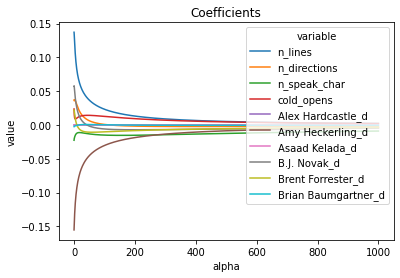

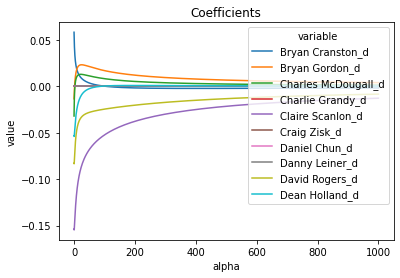

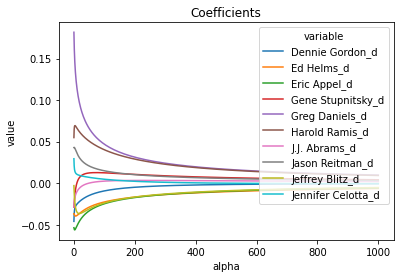

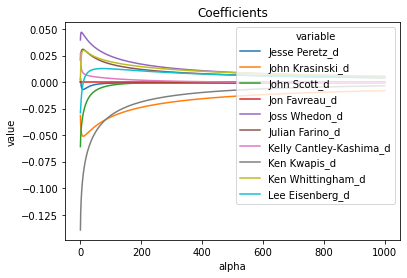

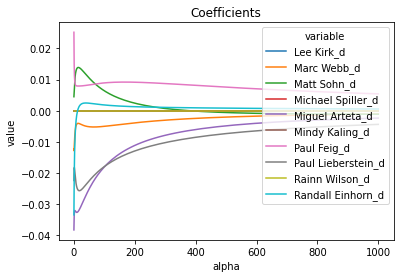

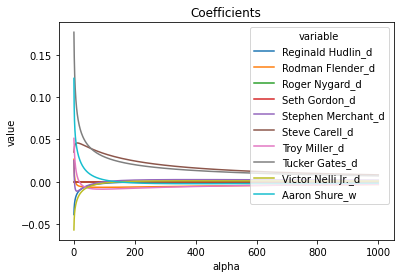

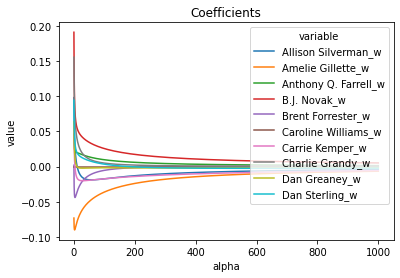

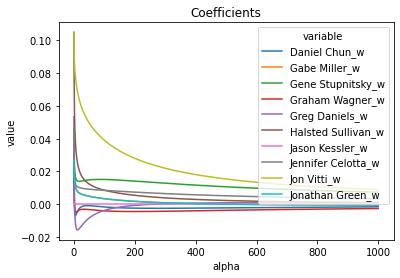

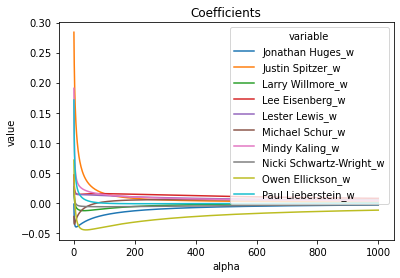

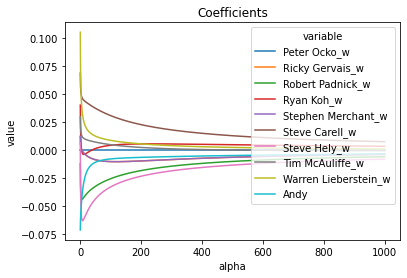

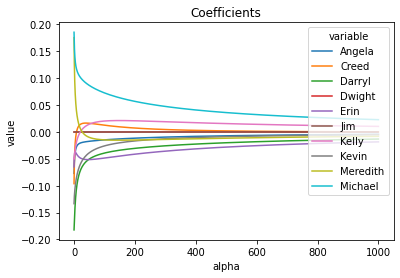

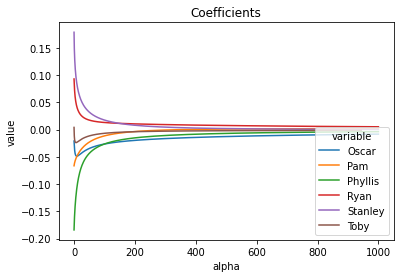

In [30]:
for i in range(0,22000,2000):
  sns.lineplot(x='alpha', y='value', hue='variable', data=res[i:i+2000]).set_title("Coefficients")
  plt.show()

sns.lineplot(x='alpha', y='value', hue='variable', data=res[22000:-1]).set_title("Coefficients")
plt.show()

#from these plots, we have to find out, who the highest influence has and then check if the influence in positive or negative
#would it make sense to use clustering to find a writer/director
#we can say that we only focus on predicting categorial data and as a writer has his specific style, he will automatically use the right amount of speaking characters, lines and directions
#how many characters do we want -> find extra data to see hoe many main characters we have


##Lasso##

{'lasso__alpha': 1.0050251256281406}


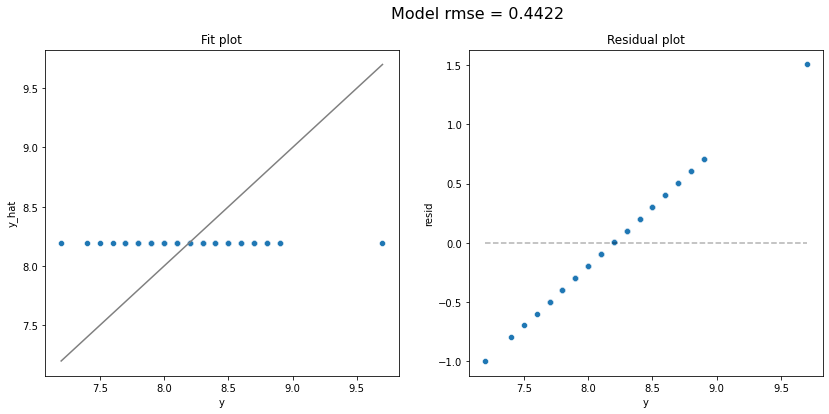

0.44219475821589244

In [32]:
#WITH STANDARD SCALER
from sklearn.linear_model import Lasso
alphas = np.linspace(0, 200, num=200)
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Lasso()
    ),
    param_grid={'lasso__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X, y_train)
print(gs.best_params_) 
model_fit(gs.best_estimator_, X_test_matrix, y_test, plot=True)

{'lasso__alpha': 1.0050251256281406}


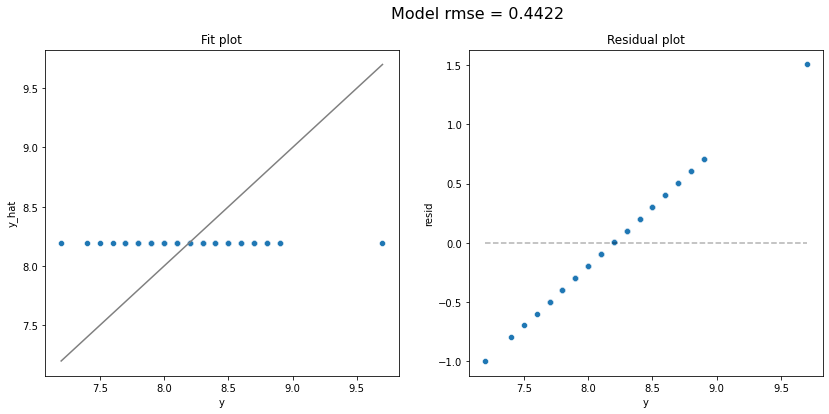

0.44219475821589244

In [33]:
from sklearn.linear_model import Ridge

#WITHOUT STANDARD SCALER
alphas = np.linspace(0, 200, num=200)
gs = GridSearchCV(
    make_pipeline(
        Lasso()
    ),
    param_grid={'lasso__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X, y_train)
print(gs.best_params_) 
model_fit(gs.best_estimator_, X_test_matrix, y_test, plot=True)

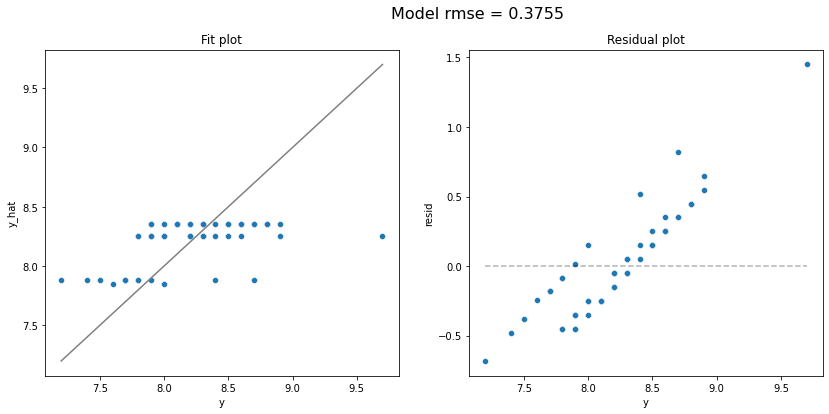

In [34]:
#lasso regression


l = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.1)
).fit(X, y_train)
model_fit(l, X_test_matrix, y_test, plot=True);
#print("lasso coefs:", get_coefs(l))

In [36]:
alpha = np.logspace(-2,3,50)
rmse_lasso = np.zeros(len(alpha))
for index, i in enumerate(alpha):
  l = make_pipeline(
    StandardScaler(),
    Lasso(alpha=i)).fit(X, y_train)
  rmse_lasso[index] = model_fit(l, X_test_matrix, y_test)


Text(0, 0.5, '$rmse$')

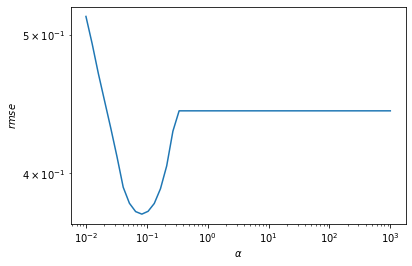

In [37]:
plt.loglog(alpha,rmse_lasso)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$rmse$')

#plot suggests to use alpha = 0.1

In [39]:
alphas = np.logspace(-3, 1, num=200)
betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Lasso(alpha=a)
    ).fit(X, y_train)

    # Again ignore the intercept since it isn't included in the penalty
    betas.append(get_coefs(m)[1:])  
    rmses.append(model_fit(m, X_test_matrix, y_test))

res = pd.DataFrame(
    data = betas,       # Coefficients
    columns = d_final[X.columns].columns, # Coefficient names
).assign(
    alpha = alphas,     # Add alpahs
    rmse = rmses        # Add validation rmses
).melt(
    id_vars = ('alpha', 'rmse') # Move columns into the rows
)
res

,alpha,rmse,variable,value
0,0.001000,0.715883,n_lines,0.139422
1,0.001047,0.714296,n_lines,0.139089
2,0.001097,0.712579,n_lines,0.138751
3,0.001149,0.710288,n_lines,0.138434
4,0.001203,0.707903,n_lines,0.138090
...,...,...,...,...
23195,8.309942,0.442195,Toby,-0.000000
23196,8.703591,0.442195,Toby,-0.000000
23197,9.115888,0.442195,Toby,-0.000000
23198,9.547716,0.442195,Toby,-0.000000


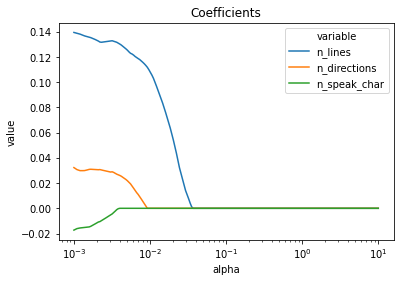

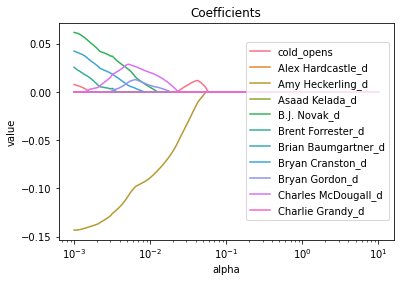

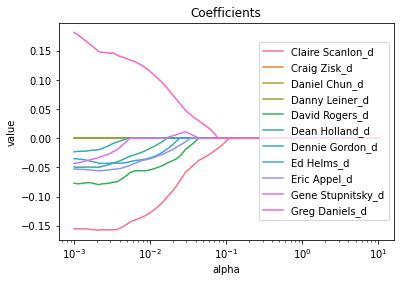

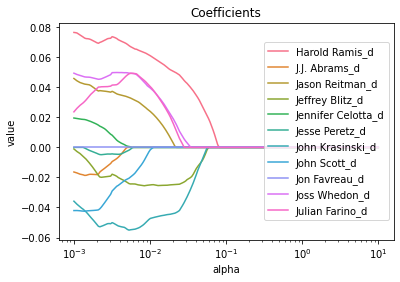

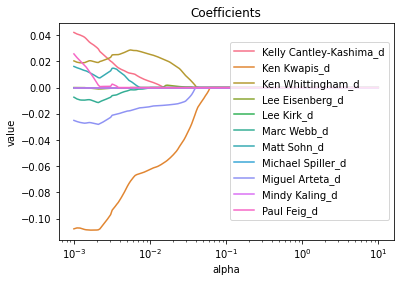

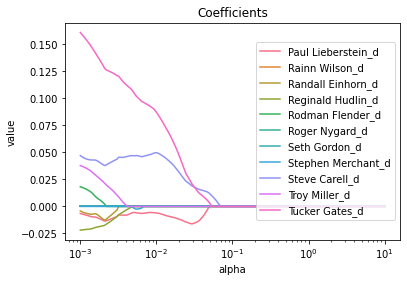

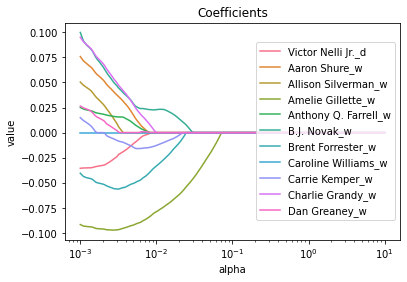

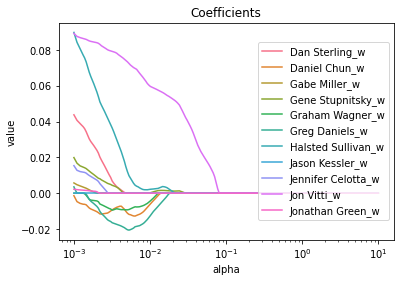

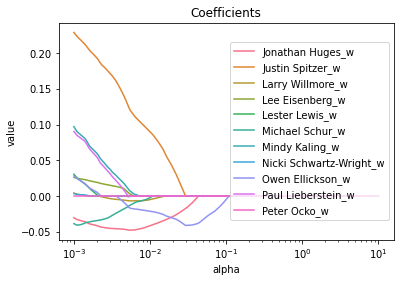

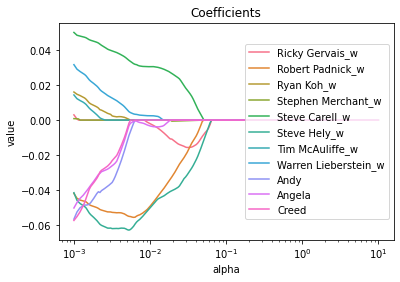

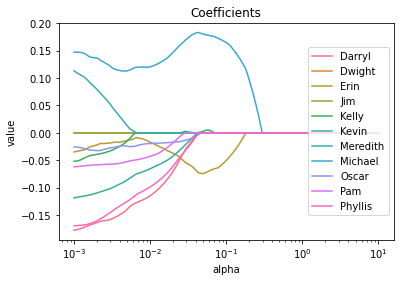

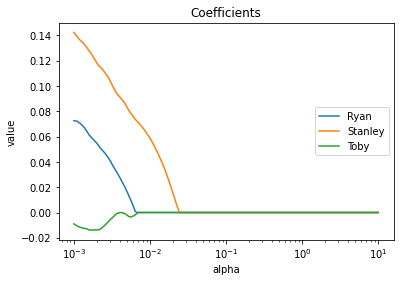

In [40]:
sns.lineplot(x='alpha', y='value', hue='variable', data=res[0:600]).set_title("Coefficients")
plt.xscale('log')
plt.show()

for i in range(0,11):
  sns.lineplot(x='alpha', y='value', hue='variable', data=res[600+i*2200:i*2200+2800]).set_title("Coefficients")
  plt.xscale('log')
  plt.legend(loc="right")
  plt.show()

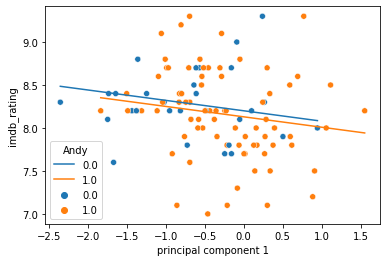

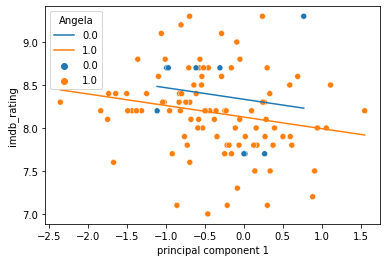

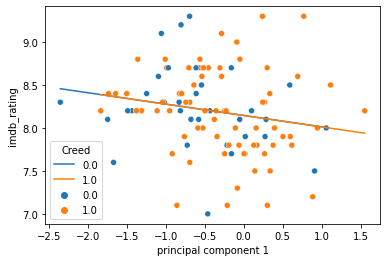

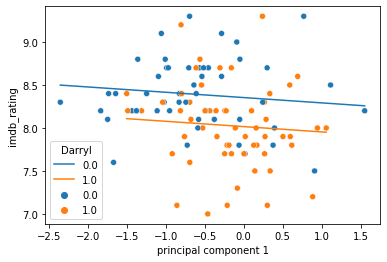

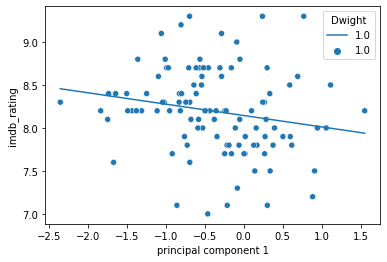

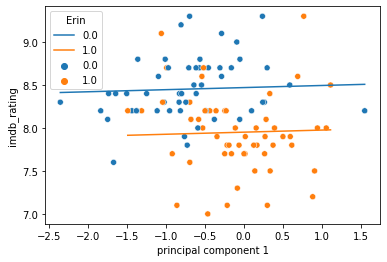

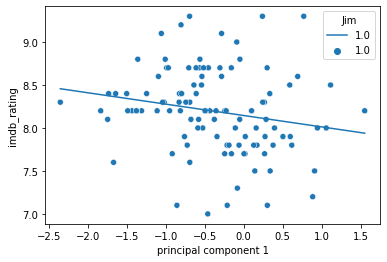

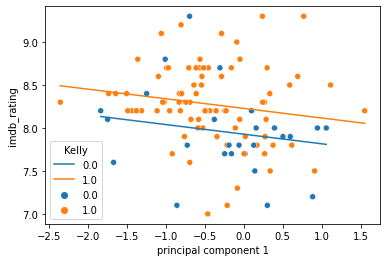

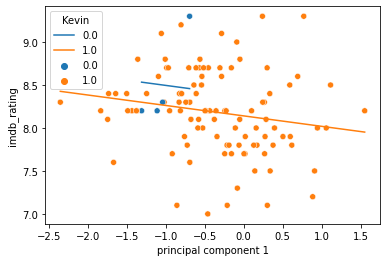

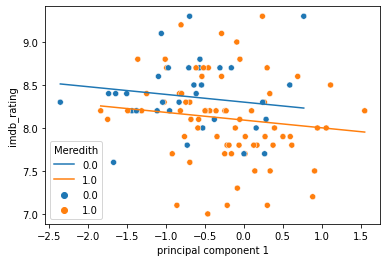

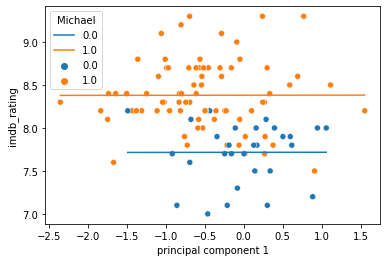

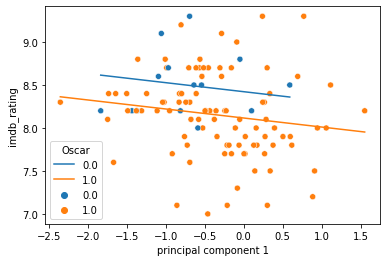

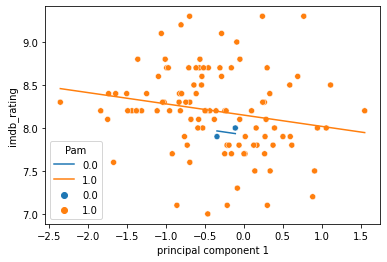

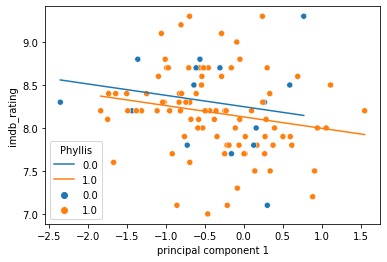

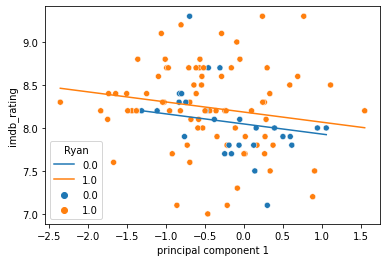

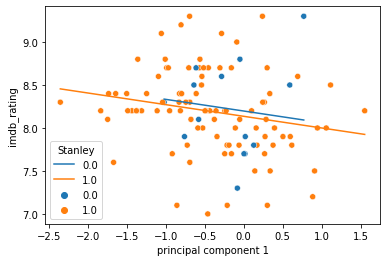

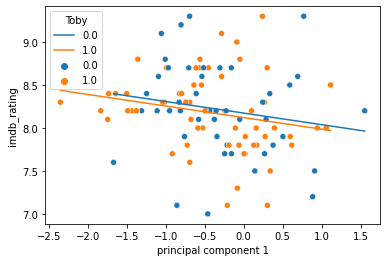

,character,rmse_train,rmse_test
0,Andy,0.4722675827978506,0.46906699373550687
1,Angela,0.46977055858354305,0.47475831373360083
2,Creed,0.473245452843458,0.47051423540731496
3,Darryl,0.44514497844299683,0.46595803727300983
4,Dwight,0.47324568840075404,0.47051204043687267
5,Erin,0.41144305941843623,0.41628432608125143
6,Jim,0.47324568840075404,0.47051204043687267
7,Kelly,0.4552971739908293,0.44442067620947595
8,Kevin,0.4712561396063716,0.4669362938336829
9,Meredith,0.46386241304662873,0.4756156966424484


In [41]:
# pca regression for each main character
# to estimate character inclusion in episodes on imdb_rating 
char_rmse_train = []
char_rmse_test = []
for i in main_characters:
  X = np.c_[np.ones(len(y_train)), 
            X_train["principal component 1"], 
            X_train[i]]
  l = LinearRegression(fit_intercept=False).fit(X, y_train)

  X_train[i+"_pred"] = l.predict(X)

  sns.scatterplot(x="principal component 1", y=y_train, hue=i, data=X_train)
  sns.lineplot(x="principal component 1", y=i+"_pred", hue=i, data=X_train)
  plt.show()

  char_rmse_train.append(model_fit(l,X,y_train))
  char_rmse_test.append(model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  

char_rmse = pd.DataFrame(np.transpose([main_characters,char_rmse_train,char_rmse_test]),columns = ['character','rmse_train','rmse_test'])
char_rmse

findings from training data:

Andy - Yes 

Angela - No

Creed  - Yes

Daryll - No

Dwight - Yes

Erin - No

Jim - Yes

Kelly - No

Kevin - No - missed 3 episodes

Meredith - No

Michael - Yes

Oscar - No

Pam - Yes

Phyliss - No - missed 7 episodes

Ryan - No 

Stanley - Yes

Toby - Yes

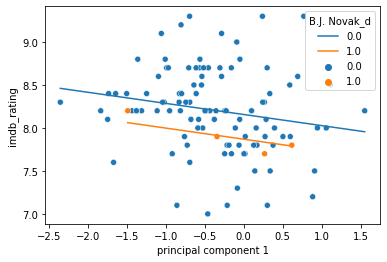

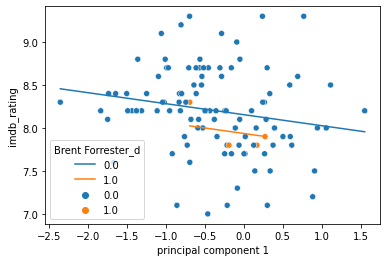

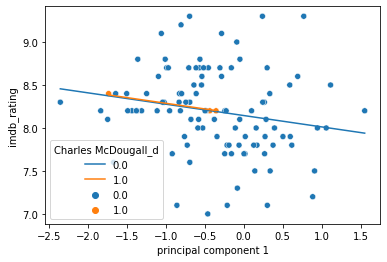

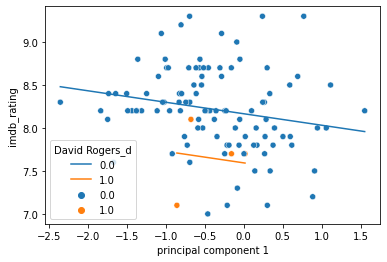

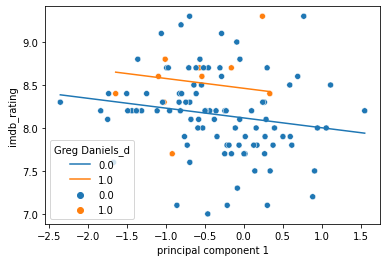

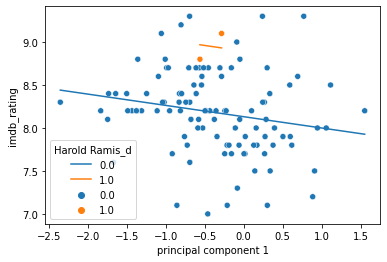

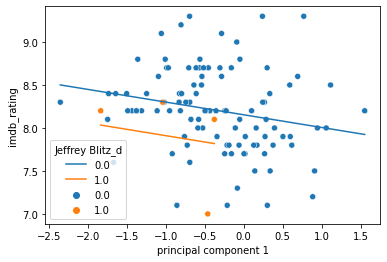

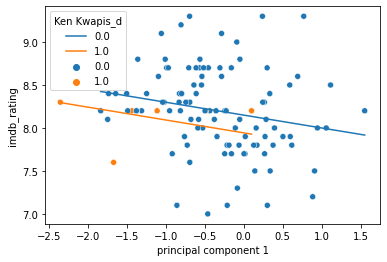

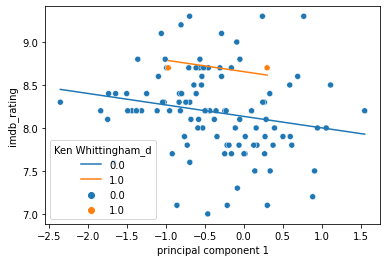

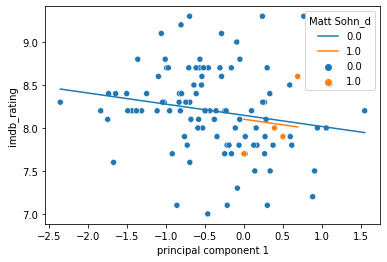

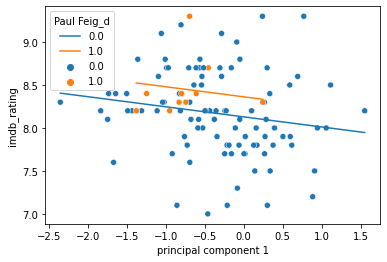

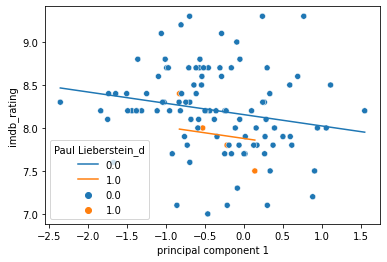

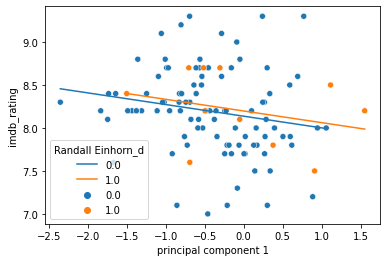

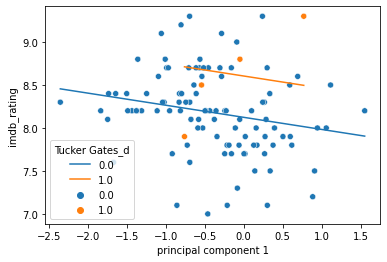

,writer,rmse_train,rmse_test
0,B.J. Novak_d,0.4701288056969637,0.4712070115064449
1,Brent Forrester_d,0.4714503189060263,0.46858481359472054
2,Charles McDougall_d,0.47324243785991854,0.4701316832402345
3,David Rogers_d,0.46077094063547613,0.46937739894602115
4,Greg Daniels_d,0.46178535431889867,0.45774849057475747
5,Harold Ramis_d,0.46192484625972485,0.47133782346956615
6,Jeffrey Blitz_d,0.46758976044051814,0.49603813935667684
7,Ken Kwapis_d,0.4710387987135654,0.4871681512189267
8,Ken Whittingham_d,0.468012796389871,0.5038902254200682
9,Matt Sohn_d,0.4731698734428748,0.4665700591554986


In [42]:
# pca regression for each director
# to estimate director's influence on imdb_rating 

final_directors = []

# drop directors who directed less than 4 episodes (on average directors directed 3.4 episodes)

directors_rmse_train = []
directors_rmse_test = []
for i in directors_corrected:
  if np.sum(d_new[i])>3:
    final_directors.append(i)

for i in final_directors:
  X = np.c_[np.ones(len(y_train)), 
            X_train["principal component 1"], 
            X_train[i]]
  l = LinearRegression(fit_intercept=False).fit(X, y_train)

  X_train[i+"_pred"] = l.predict(X)

  sns.scatterplot(x="principal component 1", y=y_train, hue=i, data=X_train)
  sns.lineplot(x="principal component 1", y=i+"_pred", hue=i, data=X_train)
  plt.show()

  directors_rmse_train.append(model_fit(l,X,y_train))
  directors_rmse_test.append(model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  

directors_rmse = pd.DataFrame(np.transpose([final_directors,directors_rmse_train,directors_rmse_test]),columns = ['writer','rmse_train','rmse_test'])
directors_rmse


Directors

* B.J. Novak : no
* Brent Forrester : no (only one episode) 
* Charles McDougall : yes
* David Rogers : no (only one episode)
* Greg Daniels : no
* Harold Ramis : yes
* Jeffrey Blitz : yes
* Ken Kwapis : yes
* Ken Whittingham : yes
* Matt Sohn : no training data
* Paul Feig : yes
* Paul Lieberstein : yes
* Randall Einhorn : yes
* Tucker Gates : no



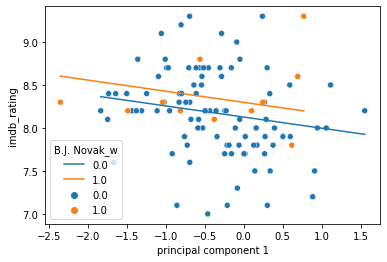

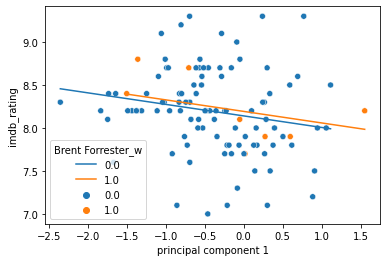

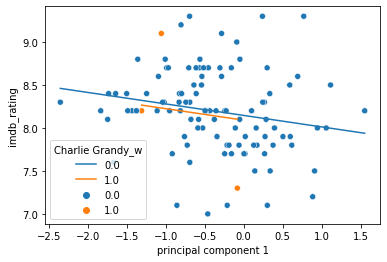

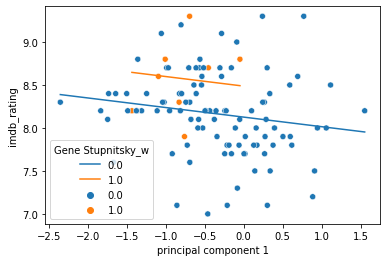

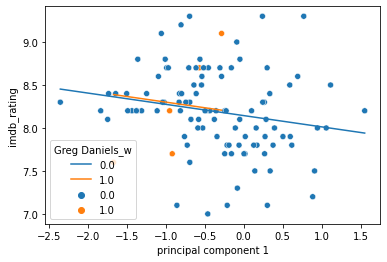

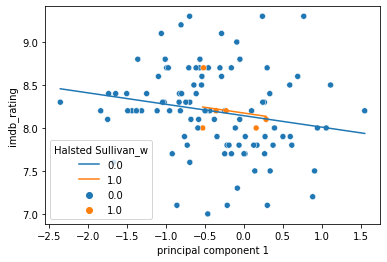

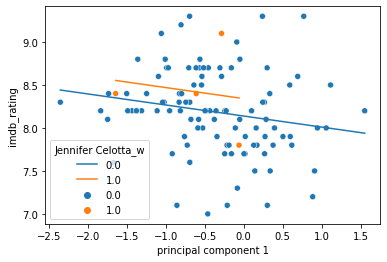

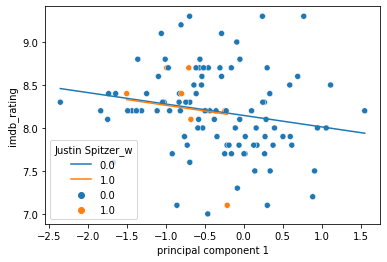

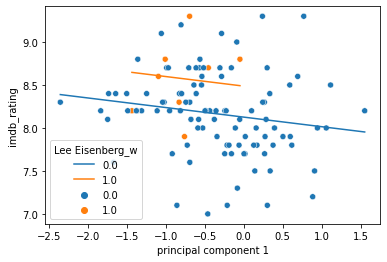

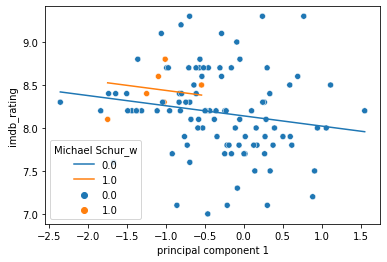

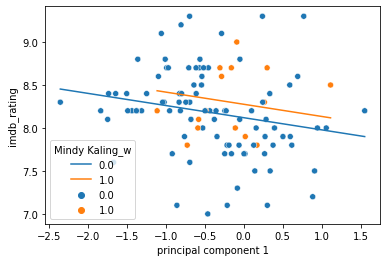

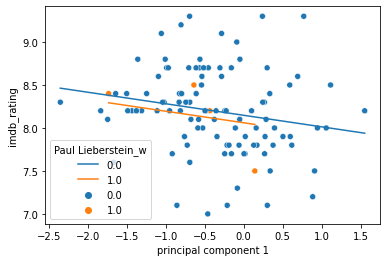

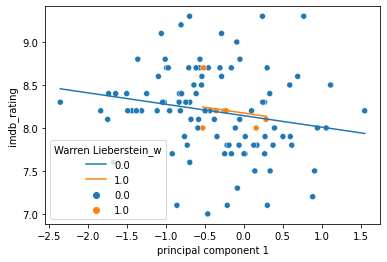

,writer,rmse_train,rmse_test
0,B.J. Novak_w,0.47018694378825554,0.4680396352338419
1,Brent Forrester_w,0.47304842079207626,0.4692443851050428
2,Charlie Grandy_w,0.47315991283375614,0.4699699989718508
3,Gene Stupnitsky_w,0.46397134495895104,0.47232041289728866
4,Greg Daniels_w,0.4732099402647961,0.4672287878135826
5,Halsted Sullivan_w,0.47319277185748204,0.47145374991358197
6,Jennifer Celotta_w,0.47170448344954047,0.46558177520967786
7,Justin Spitzer_w,0.4732325870035261,0.4710515755125597
8,Lee Eisenberg_w,0.46397134495895104,0.47232041289728866
9,Michael Schur_w,0.4715885923393307,0.45831212766081836


In [43]:
final_writers = []
# drop directors who directed less than 4 episodes (on average directors directed 3.4 episodes)

for i in writers:
  if np.sum(d_new[i])>6:
    final_writers.append(i)
writer_rmse_train = []
writer_rmse_test = []
for i in final_writers:
  X = np.c_[np.ones(len(y_train)), 
            X_train["principal component 1"], 
            X_train[i]]
  l = LinearRegression(fit_intercept=False).fit(X, y_train)

  X_train[i+"_pred"] = l.predict(X)

  sns.scatterplot(x="principal component 1", y=y_train, hue=i, data=X_train)
  sns.lineplot(x="principal component 1", y=i+"_pred", hue=i, data=X_train)
  plt.show()
  writer_rmse_train.append(model_fit(l,X,y_train))
  writer_rmse_test.append(model_fit(l,np.c_[np.ones(len(y_test)), X_test["principal component 1"], X_test[i]],y_test))
  

writer_rmse = pd.DataFrame(np.transpose([final_writers,writer_rmse_train,writer_rmse_test]),columns = ['writer','rmse_train','rmse_test'])
writer_rmse

#I'm not sure about that but the rmse for training and test are about the same, therefore our model is good?

Writers

* B.J. Novak : no
* Brent Forrester: yes
* Charlie Grandy : no
* Gene Stupnitsky : yes
* Greg Daniels : no
* Halsted Sullivan : yes
* Jennifer Celotta : yes
* Justin Spitzer : yes
* Lee Eisenberg : yes
* Michael Schur : yes
* Mindy Kaling : no 
* Paul Lieberstein : yes
* Warren Lieberstein : yes

11


0.20518295200343623

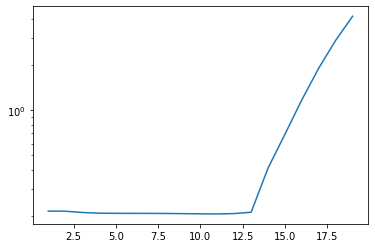

In [44]:
# find optimal degree for polynomial fit of nonlinear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degrees = np.arange(1,20)
mse = np.zeros(len(degrees))
for index,i in enumerate(degrees):
  X = PolynomialFeatures(degree = i).fit_transform(np.c_[X_train["n_speak_char"]])

  l = LinearRegression(fit_intercept = False).fit(X,y_train)

  X_train[str(i)] = l.predict(X)
  mse[index] = mean_squared_error(y_train,X_train[str(i)])

plt.plot(degrees,mse)
plt.yscale('log')



print(degrees[np.argmin(mse)])
mse[np.argmin(mse)]

# should use degree = 12


15.0

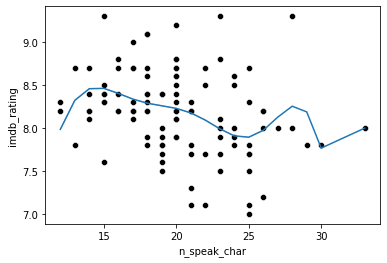

In [45]:
# analysing optimal number of speakers (n_speak_char), not main characters
from sklearn.preprocessing import PolynomialFeatures

X = PolynomialFeatures(degree = 12).fit_transform(np.c_[X_train["n_speak_char"]])
l = LinearRegression(fit_intercept = False).fit(X,y_train)

X_train["pred_speak_char12"] = l.predict(X)

sns.scatterplot(x=X_train['n_speak_char'], y=y_train, color="black")
sns.lineplot(x=X_train['n_speak_char'], y=X_train['pred_speak_char12'])

X_train['n_speak_char'][np.argmax(X_train['pred_speak_char12'])]

In [46]:
display('rmse of test data: ',model_fit(l,PolynomialFeatures(degree = 12).fit_transform(np.c_[X_test["n_speak_char"]]),y_test))
display('rmse of training data: ',model_fit(l,PolynomialFeatures(degree = 12).fit_transform(np.c_[X_train["n_speak_char"]]),y_train))

'rmse of test data: '

0.4753932604442662

'rmse of training data: '

0.4541580812912118

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a NBC Universal executive who is with the show and  university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*